In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# load mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# adjusting to 0 ~ 1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Functional API

input_shape = (28, 28, 1)
img_input = tf.keras.layers.Input(shape=input_shape)

h = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                            filters=16,
                            activation='relu')(img_input)
h = tf.keras.layers.MaxPooling2D((2, 2))(h)

h = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                            filters=32,
                            activation='relu')(h)
h = tf.keras.layers.MaxPooling2D((2, 2))(h)

h = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                            filters=64,
                            activation='relu')(h)
h = tf.keras.layers.Flatten()(h)

h = tf.keras.layers.Dense(32, activation='relu')(h)
predictions = tf.keras.layers.Dense(10, activation='softmax')(h)

model = tf.keras.Model(inputs=img_input, outputs=predictions)

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)        0         
2D)                                                              
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)          0         
2D)                                                              
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          1849

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.25, verbose=2)

Epoch 1/5
1407/1407 - 10s - loss: 0.2367 - accuracy: 0.9272 - val_loss: 0.0906 - val_accuracy: 0.9731 - 10s/epoch - 7ms/step
Epoch 2/5
1407/1407 - 10s - loss: 0.0710 - accuracy: 0.9785 - val_loss: 0.0634 - val_accuracy: 0.9821 - 10s/epoch - 7ms/step
Epoch 3/5
1407/1407 - 10s - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0542 - val_accuracy: 0.9844 - 10s/epoch - 7ms/step
Epoch 4/5
1407/1407 - 10s - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0523 - val_accuracy: 0.9847 - 10s/epoch - 7ms/step
Epoch 5/5
1407/1407 - 9s - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0500 - val_accuracy: 0.9863 - 9s/epoch - 7ms/step


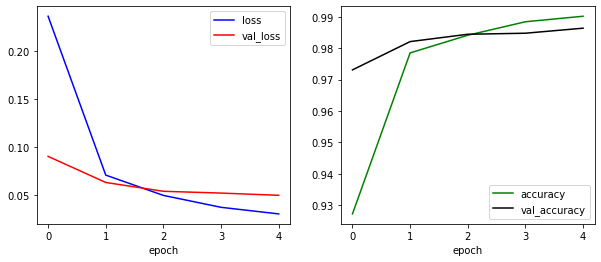

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(test_loss, test_acc)

0.03445795923471451 0.9890999794006348
